In [2]:
cd dssp

/home/bhumika/Desktop/pep_ff/AMBER_RESULTS/2JQ0/dssp


In [3]:
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

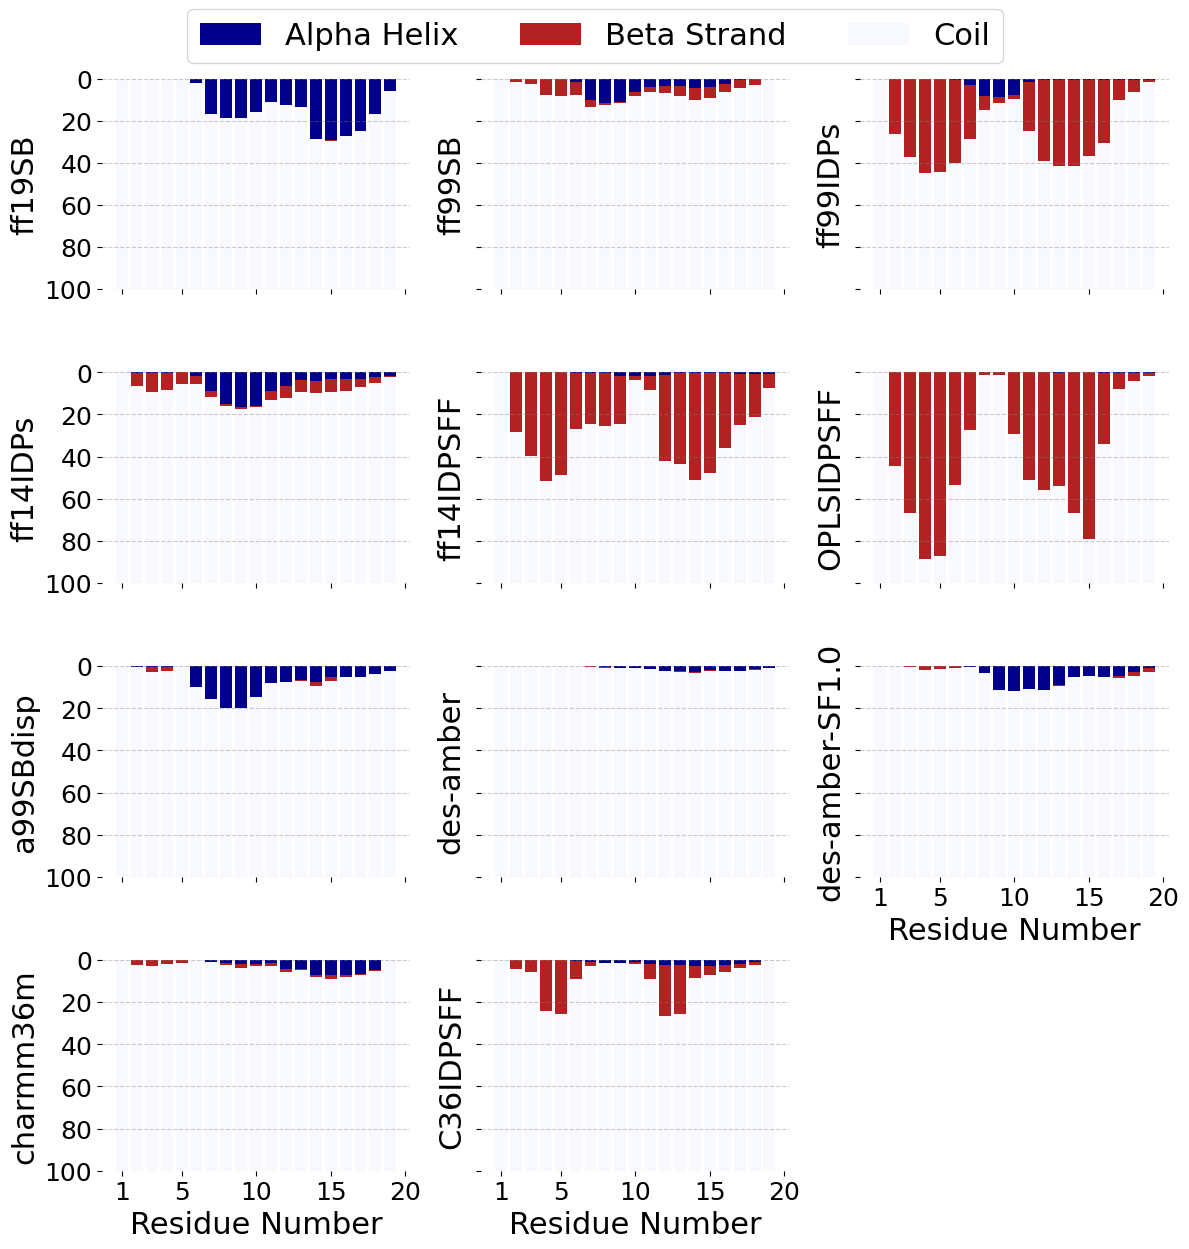

In [6]:
# Label dictionary to categorize structure types
my_label = {0: "None", 1: "Extended", 2: "None", 3: "Alpha", 4: "Alpha", 5: "Alpha", 6: "None", 7: "None"}
# File paths and labels
# Titles for data files and corresponding labels
titles = ["ff19SB_dssp.dat", "ff99SB_dssp.dat", "ff99IDPs_dssp.dat", "ff14IDPs_dssp.dat", "ff14IDPSFF_dssp.dat",
          "OPLSIDPSFF_dssp.dat", "a99SBdisp_dssp.dat", "des-amber_dssp.dat", "des-amber-SF1.0_dssp.dat", "charmm36m_dssp.dat",
          "C36IDPSFF_dssp.dat"]
file_labels = ["ff19SB", "ff99SB", "ff99IDPs", "ff14IDPs", "ff14IDPSFF",
               "OPLSIDPSFF", "a99SBdisp", "des-amber", "des-amber-SF1.0", "charmm36m", "C36IDPSFF"]

# Color mapping for structure types
color_map = {
    "None": "ghostwhite",
    "Extended": "firebrick",
    "Alpha": "#00008B"
}
# Create figure and 4x3 grid of subplots
fig, axs = plt.subplots(4, 3, figsize=(12, 12), sharex=True)
fig.subplots_adjust(hspace=0.0, wspace=0.2)
# Plot data
for i in range(12):  # Loop over all 12 subplots
    row, col = divmod(i, 3)
    ax = axs[row, col]
    if i < len(titles):
        data = np.loadtxt(titles[i], skiprows=1)[:, 1:20]
        dimx, dimy = data.shape
        x = np.arange(1, dimy + 1)
        # Initialize populations
        population_counts = {'None': np.zeros(dimy), 'Extended': np.zeros(dimy), 'Alpha': np.zeros(dimy)}
        # Count labels
        for label in range(8):
            new_label = my_label[label]
            population_counts[new_label] += (data == label).sum(axis=0)
        # Normalize to %
        total_frames = dimx
        for key in population_counts:
            population_counts[key] = (population_counts[key] / total_frames) * 100
        # Stacked bar plot
        ax.bar(x, population_counts["Alpha"], color=color_map["Alpha"])
        ax.bar(x, population_counts["Extended"], bottom=population_counts["Alpha"], color=color_map["Extended"])
        ax.bar(x, population_counts["None"],
               bottom=population_counts["Alpha"] + population_counts["Extended"],
               color=color_map["None"])
        ax.set_ylabel(file_labels[i], fontsize=22)
    else:
        ax.axis('off')  # Hide unused subplot
# Style and layout
for i, ax in enumerate(axs.flat):
    ax.set_ylim(100, 0)
    ax.set_yticks(np.arange(100, -1, -20))
    ax.tick_params(axis='y', labelsize=18)
    # Remove y-tick labels for non-first-column plots
    if i % 3 != 0:
        ax.set_yticklabels([])
    # Hide top/right/left/bottom spines and add grid
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.yaxis.grid(True, linestyle='--', color='gray', alpha=0.4)
# Set x-axis labels only on last row
for ax in axs[3, :]:
    ax.set_xlabel("Residue Number", fontsize=22)
    ax.set_xticks([1, 5, 10, 15, 20])
    ax.tick_params(axis='x', labelsize=18, labelbottom=True)
# Explicitly enable x-tick labels on subplot 8 (index 8 = axs[2, 2])
axs[2, 2].set_xlabel("Residue Number", fontsize=22)
axs[2, 2].set_xticks([1, 5, 10, 15, 20,])
axs[2, 2].tick_params(axis='x', labelsize=18, labelbottom=True)
# Add legend on top
fig.legend(["Alpha Helix", "Beta Strand", "Coil"], loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.05), fontsize=22)
# Final layout and save
plt.tight_layout()
plt.savefig('dssp_all.png', bbox_inches='tight', dpi=600)
plt.show()

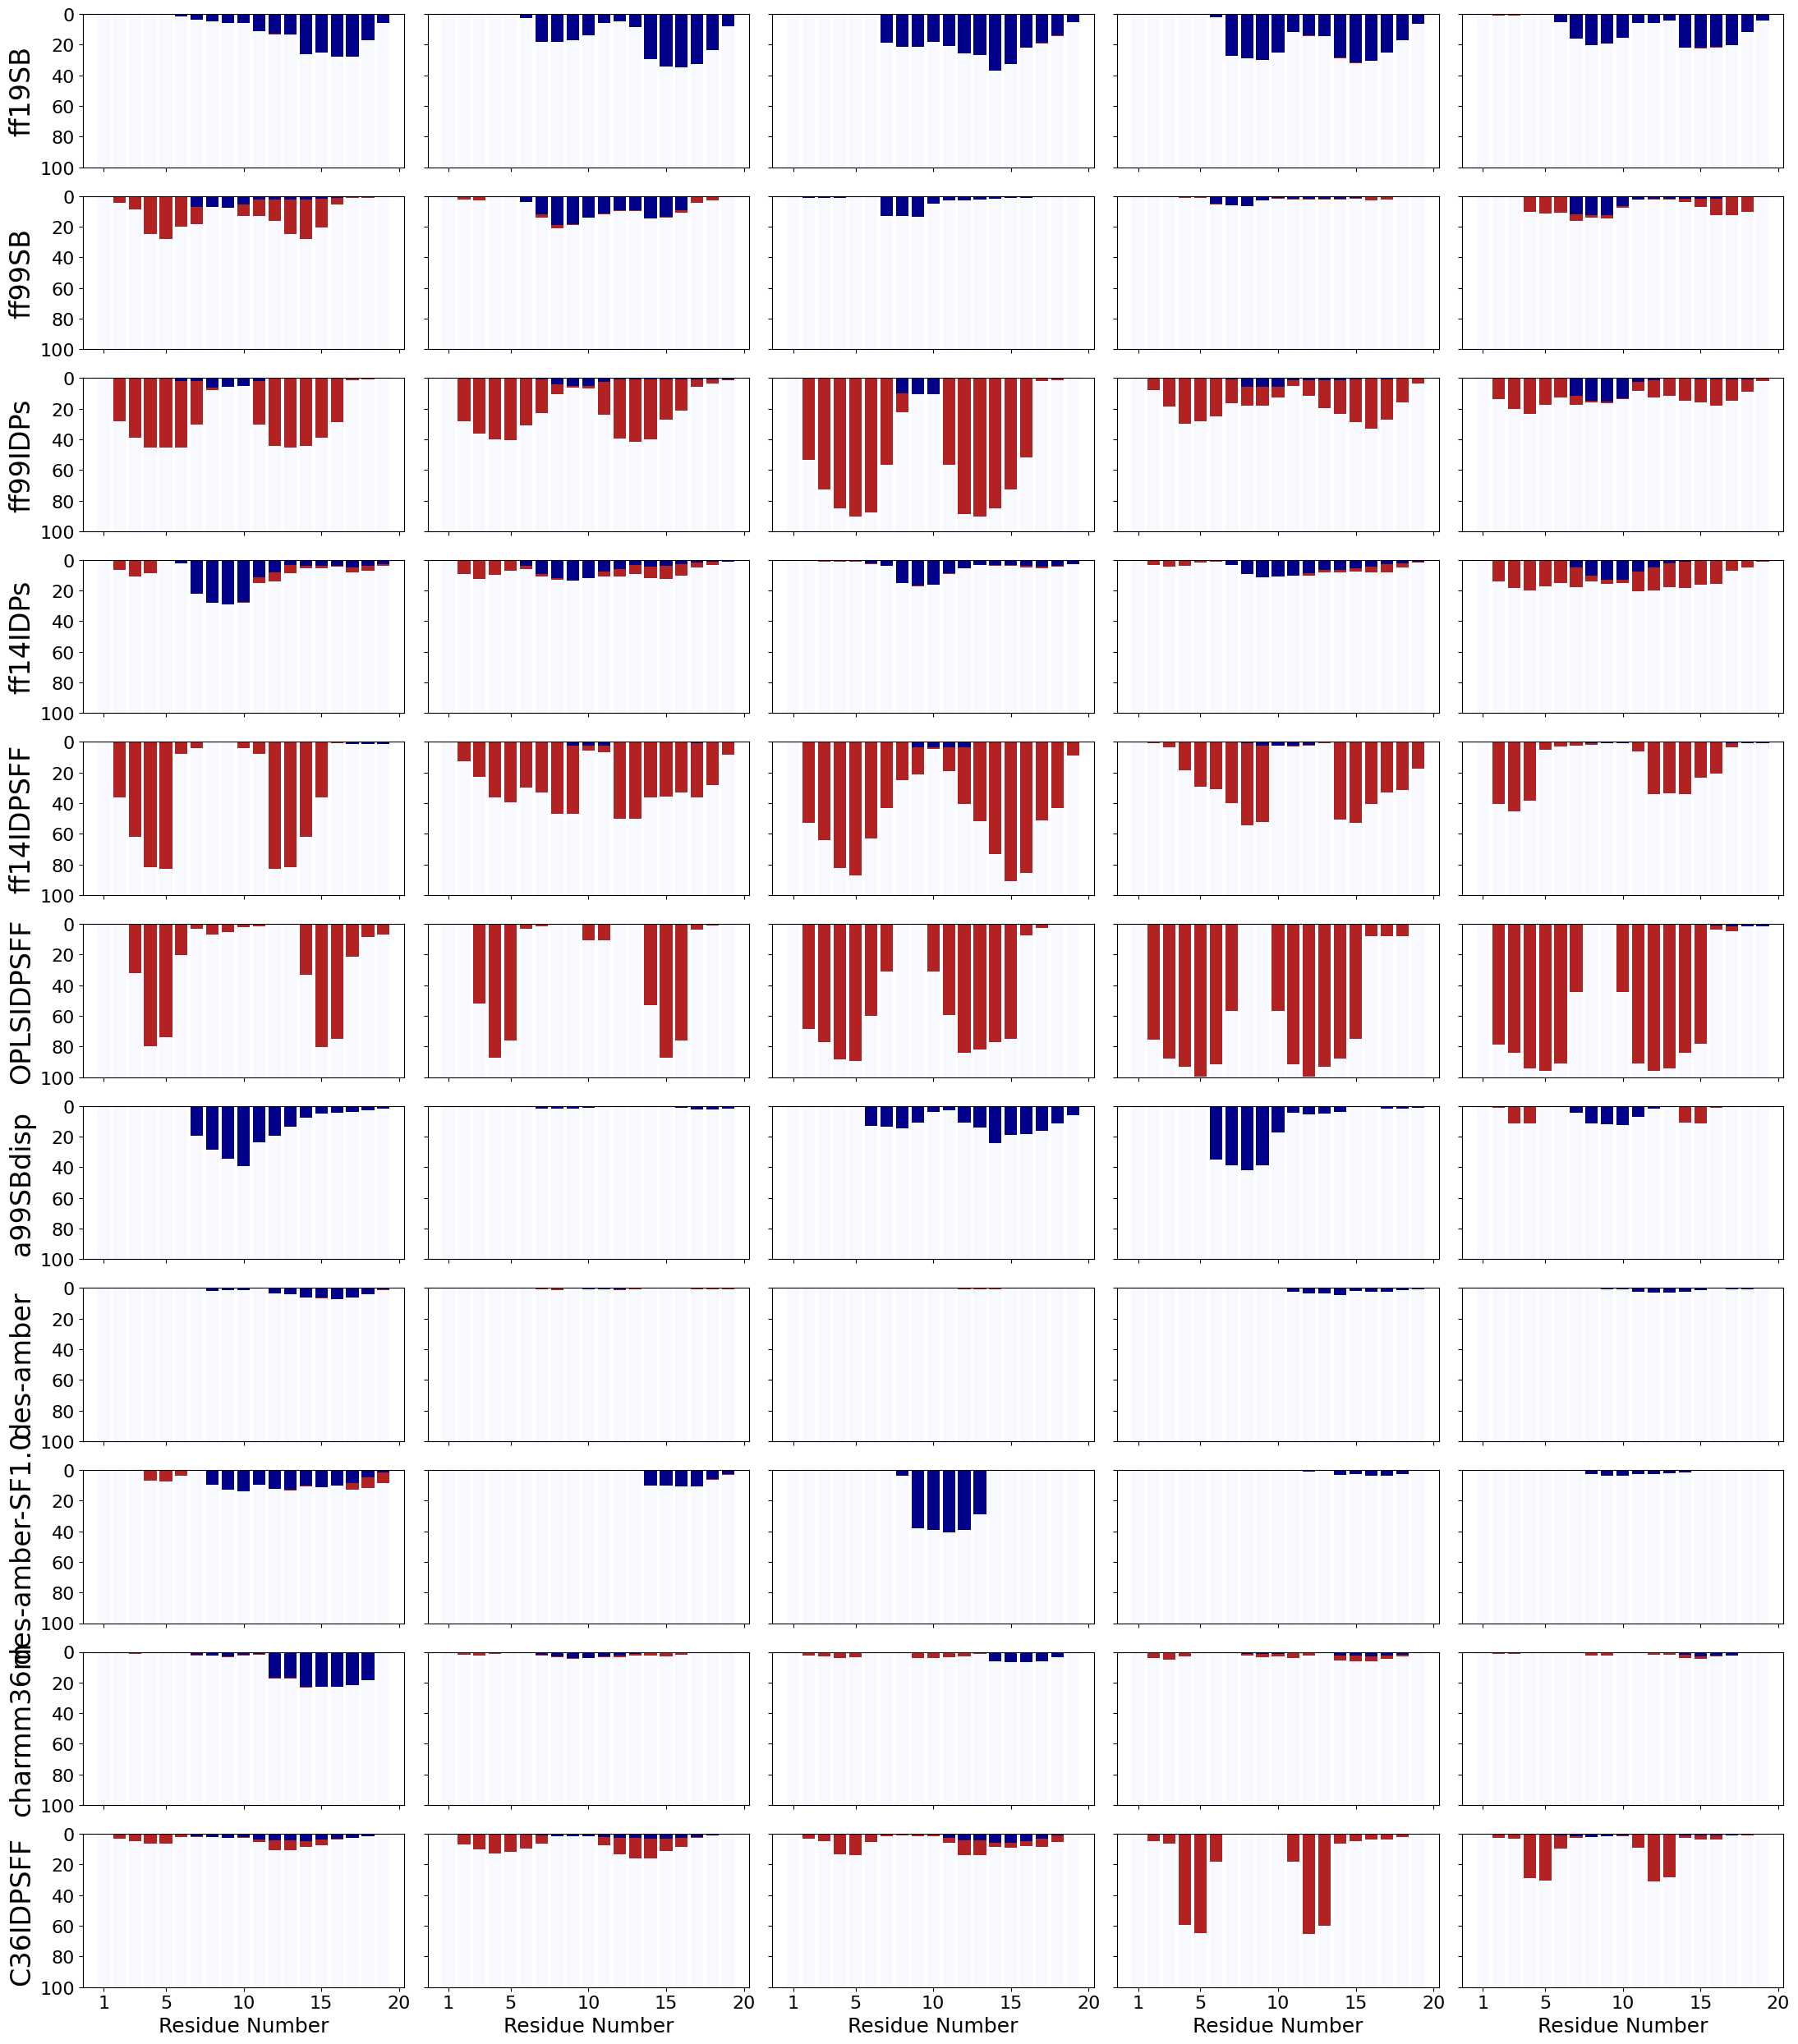

In [7]:
# Label mapping
my_label = {0: "None", 1: "Extended", 2: "None", 3: "Alpha",
            4: "Alpha", 5: "Alpha", 6: "None", 7: "None"}

# File names and labels
titles = ["ff19SB_dssp.dat", "ff99SB_dssp.dat", "ff99IDPs_dssp.dat", "ff14IDPs_dssp.dat", "ff14IDPSFF_dssp.dat",
          "OPLSIDPSFF_dssp.dat", "a99SBdisp_dssp.dat", "des-amber_dssp.dat", "des-amber-SF1.0_dssp.dat", "charmm36m_dssp.dat",
          "C36IDPSFF_dssp.dat"]

file_labels = [
    "ff19SB", "ff99SB", "ff99IDPs", "ff14IDPs", "ff14IDPSFF",
    "OPLSIDPSFF", "a99SBdisp", "des-amber", "des-amber-SF1.0", "charmm36m", "C36IDPSFF"
]

# Segment ranges
start_lines = [1, 100001, 200001, 300001, 400001]
end_lines = [100000, 200000, 300000, 400000, 500000]

# Colors
color_map = {
    "None": "ghostwhite",
    "Extended": "firebrick",
    "Alpha": "#00008B"
}

# Create 11x5 subplot grid
fig, axs = plt.subplots(11, 5, figsize=(22,25), sharex='col', sharey='row')
fig.subplots_adjust(hspace=0, wspace=0.0)

# Loop over files and segments
for i, (title, label) in enumerate(zip(titles, file_labels)):
    for j, (start, end) in enumerate(zip(start_lines, end_lines)):
        ax = axs[i, j]
        try:
            data = np.loadtxt(title, skiprows=start - 1, max_rows=end - start + 1)[:, 1:20]
        except Exception as e:
            print(f"Error loading {title}: {e}")
            continue

        dimx, dimy = data.shape
        population_counts = {'None': np.zeros(dimy), 'Extended': np.zeros(dimy), 'Alpha': np.zeros(dimy)}

        for label_val in range(8):
            new_label = my_label[label_val]
            population_counts[new_label] += (data == label_val).sum(axis=0)

        total_frames = data.shape[0]
        for key in population_counts:
            population_counts[key] = (population_counts[key] / total_frames) * 100

        x = np.arange(1, dimy + 1)
        ax.bar(x, population_counts["Alpha"], color=color_map["Alpha"])
        ax.bar(x, population_counts["Extended"], bottom=population_counts["Alpha"], color=color_map["Extended"])
        ax.bar(x, population_counts["None"],
               bottom=population_counts["Alpha"] + population_counts["Extended"],
               color=color_map["None"])

        # Y-axis labels only on first column
        if j == 0:
            ax.set_ylabel(file_labels[i], fontsize=24)
        else:
            ax.set_yticks([])

        # X-axis labels only on bottom row
        if i == 10:
            ax.set_xlabel("Residue Number", fontsize=18)
            ax.set_xticks([1, 5,10, 15, 20])
            ax.tick_params(axis='x', labelsize=16)
        else:
            ax.set_xticks([])

        ax.set_ylim(100, 0)
        ax.set_yticks(np.arange(100, -1, -20))
        ax.tick_params(axis='y', labelsize=16)

# Optional: Add a single legend (above or to side)
# fig.legend(["Alpha", "Extended", "None"], loc='upper center', ncol=3, fontsize=22)

# Save and show
plt.tight_layout()
plt.savefig('dssp_11x5.png', bbox_inches='tight', dpi=400)
plt.show()


Data shape for ff19SB_dssp.dat: (500000, 19)
Data shape for ff99SB_dssp.dat: (500000, 19)
Data shape for ff99IDPs_dssp.dat: (500000, 19)
Data shape for ff14IDPs_dssp.dat: (500000, 19)
Data shape for ff14IDPSFF_dssp.dat: (500000, 19)
Data shape for OPLSIDPSFF_dssp.dat: (500050, 19)
Data shape for a99SBdisp_dssp.dat: (500050, 19)
Data shape for des-amber_dssp.dat: (500050, 19)
Data shape for des-amber-SF1.0_dssp.dat: (500050, 19)
Data shape for charmm36m_dssp.dat: (500000, 19)
Data shape for C36IDPSFF_dssp.dat: (500051, 19)


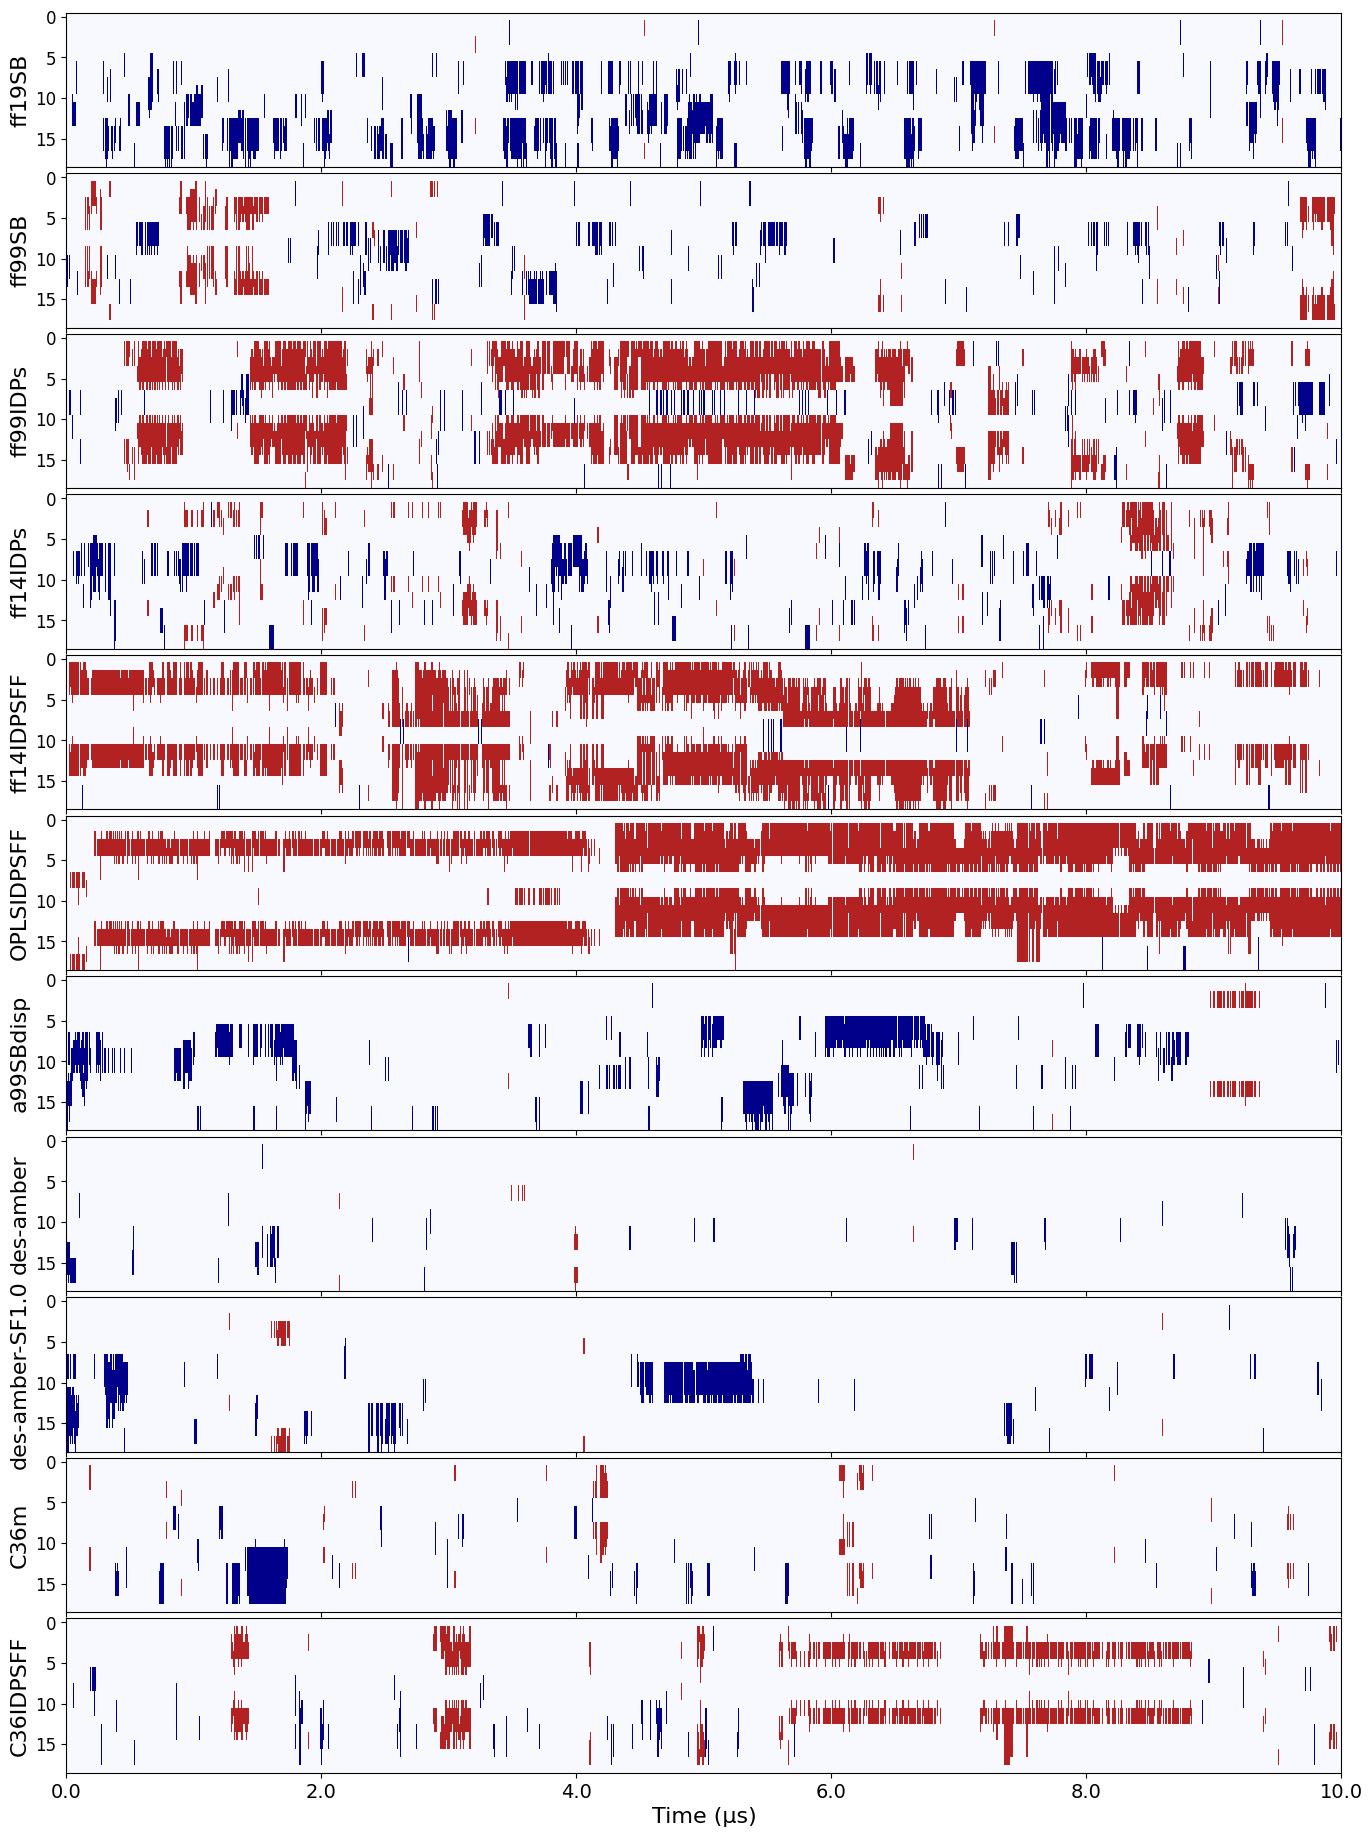

In [9]:
# Label dictionary to categorize structure types
my_label = {
    0: "None", 1: "Extended", 2: "Bridge", 3: "3-10",
    4: "Alpha", 5: "Pi", 6: "Turn", 7: "Bend"
}

# Color mapping for each label
color_map = {
    "None": "ghostwhite",
    "Bridge": "ghostwhite",
    "Turn": "ghostwhite",
    "Bend": "ghostwhite",
    "Extended": "firebrick",
    "3-10": "#00008B",
    "Alpha": "#00008B",
    "Pi": "#00008B"
}

# Create a custom colormap from `color_map`
cmap_colors = [color_map[my_label[i]] for i in range(len(my_label))]
custom_cmap = ListedColormap(cmap_colors)

# Titles for data files and corresponding labels
titles = ["ff19SB_dssp.dat", "ff99SB_dssp.dat", "ff99IDPs_dssp.dat", "ff14IDPs_dssp.dat", "ff14IDPSFF_dssp.dat",
          "OPLSIDPSFF_dssp.dat", "a99SBdisp_dssp.dat", "des-amber_dssp.dat", "des-amber-SF1.0_dssp.dat", "charmm36m_dssp.dat",
          "C36IDPSFF_dssp.dat"]

file_labels = [
    "ff19SB", "ff99SB", "ff99IDPs", "ff14IDPs", "ff14IDPSFF",
    "OPLSIDPSFF", "a99SBdisp", "des-amber", "des-amber-SF1.0",
    "C36m", "C36IDPSFF",
]

# Setup the figure and axes
fig, axs = plt.subplots(len(titles), 1, figsize=(15, len(titles) * 2), sharex=True)
fig.subplots_adjust(hspace=0.04, wspace=0)  # Ensure no space between plots

# Load data and plot
for i, title in enumerate(titles):
    # Load data
    data = np.loadtxt(f'{title}')[:, 1:20]
    print(f"Data shape for {title}: {data.shape}")
    dimx, dimy = data.shape

    # Plot using the custom colormap
    im = axs[i].imshow(
        data.T, cmap=custom_cmap, aspect='auto', interpolation='none',
        vmin=0, vmax=7  # Ensuring the range matches the label indices
    )

    # Set y-axis labels
    axs[i].set_ylabel(file_labels[i], fontsize=16)
    axs[i].tick_params(axis='y', labelsize=12)

    # Hide x-ticks except for the last subplot
    if i < len(titles) - 1:
        axs[i].tick_params(axis='x', labelbottom=False)


for ax in axs:
    # Set the x-axis tick positions to correspond to 0, 2, 4, ..., 10 microseconds
    x_ticks = np.arange(0, 10.1, 2) * 50000  # Convert microseconds back to original unit
    # Update x-axis tick positions and labels
    ax.set_xticks(x_ticks)
    ax.set_xticklabels([f"{tick:.1f}" for tick in np.arange(0, 10.1, 2)], fontsize=14)
    ax.set_xlabel('Time (µs)', fontsize=16)
    
# Adjust subplot parameters
plt.subplots_adjust(left=0.05, bottom=0.15, top=0.95)  # Adjust margins

# X-axis label for the bottom subplot
#axs[-1].set_xlabel('Simulation Time (microseconds)', fontsize=24)

# Save the figure
plt.savefig('ss_alberto_colored.png', bbox_inches='tight', dpi=600)
plt.show()